In [113]:
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

DATA PREPROCESSING

In [114]:
recipe_data = pd.read_csv('/content/meal_mate_recipes.csv')

In [115]:
recipe_data.head()

,Recipe,Ingredients,Calories,Protein,Carbs,Fats
0,Taco Night,"Steak, Potatoes, Asparagus",500,25,60,20
1,Spaghetti Bolognese,"Salmon, Asparagus, Lemon",350,30,20,15
2,Chicken Mushroom Rice,"Potato, Bacon, Sour Cream",200,10,25,5
3,Chicken Curry,"Ground Beef, Tomato Sauce, Onion",450,25,50,20
4,Pepper Beef,"Beef, Broccoli, Soy Sauce",400,35,5,25


In [117]:
ingredient_list = recipe_data['Ingredients']

In [118]:
ingredient_list

0                 Steak, Potatoes, Asparagus
1                   Salmon, Asparagus, Lemon
2                  Potato, Bacon, Sour Cream
3           Ground Beef, Tomato Sauce, Onion
4                  Beef, Broccoli, Soy Sauce
5                  Lettuce, Tomato, Cucumber
6                Pasta, Tomato Sauce, Cheese
7                        Banana, Milk, Honey
8                     Carrot, Onion, Chicken
9                       Rice, Beans, Avocado
10               Bread, Peanut Butter, Jelly
11                     Apple, Cinnamon, Oats
12                    Spinach, Egg, Mushroom
13                 Beef, Broccoli, Soy Sauce
14                       Salmon, Lemon, Dill
15                        Quinoa, Kale, Feta
16                 Potato, Bacon, Sour Cream
17                  Turkey, Cranberry, Bread
18                  Yogurt, Granola, Berries
19              Pork, Pineapple, Bell Pepper
20                    Shrimp, Garlic, Butter
21                        Lamb, Mint, Yogurt
22        

DATA VISUALIZATION

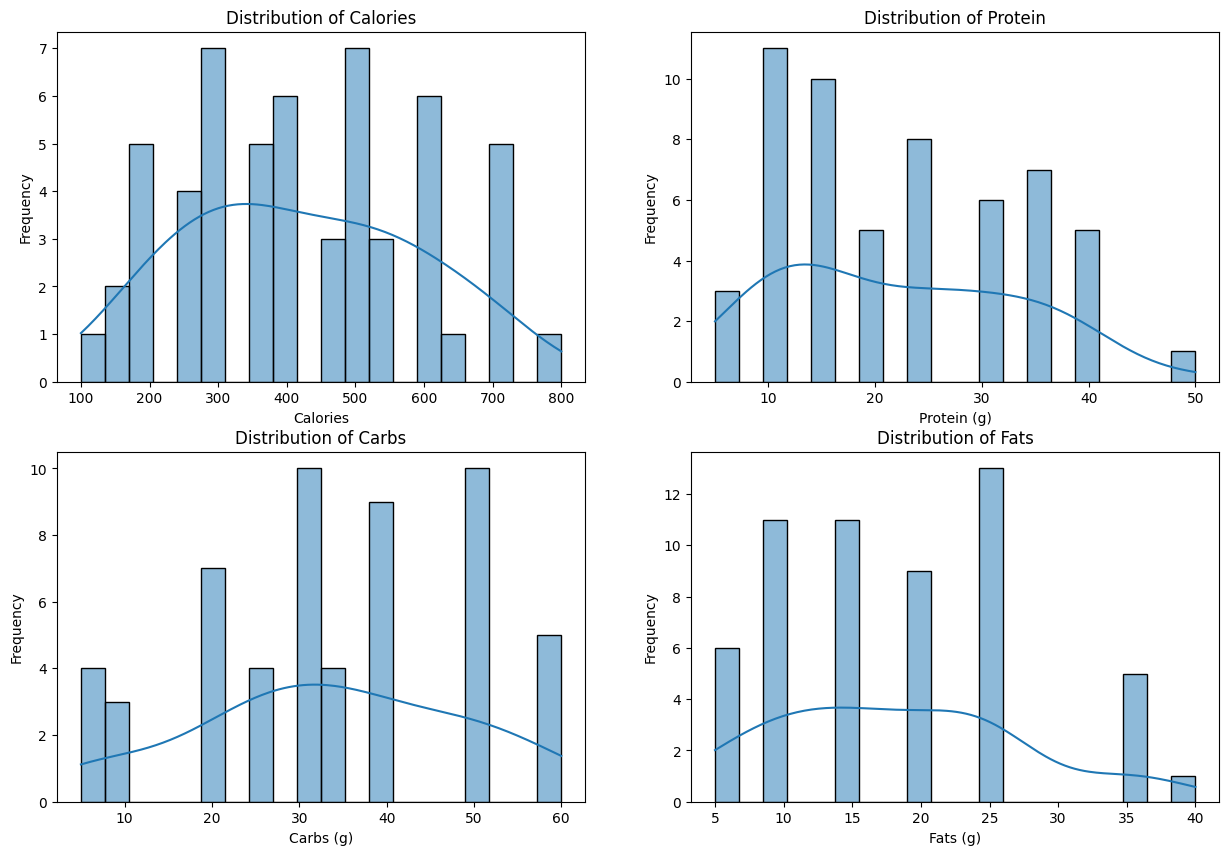

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Distribution of Calories
plt.subplot(2, 2, 1)
sns.histplot(recipe_data['Calories'], bins=20, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')

# Distribution of Protein
plt.subplot(2, 2, 2)
sns.histplot(recipe_data['Protein'], bins=20, kde=True)
plt.title('Distribution of Protein')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')

# Distribution of Carbs
plt.subplot(2, 2, 3)
sns.histplot(recipe_data['Carbs'], bins=20, kde=True)
plt.title('Distribution of Carbs')
plt.xlabel('Carbs (g)')
plt.ylabel('Frequency')

# Distribution of Fats
plt.subplot(2, 2, 4)
sns.histplot(recipe_data['Fats'], bins=20, kde=True)
plt.title('Distribution of Fats')
plt.xlabel('Fats (g)')
plt.ylabel('Frequency')


plt.show()

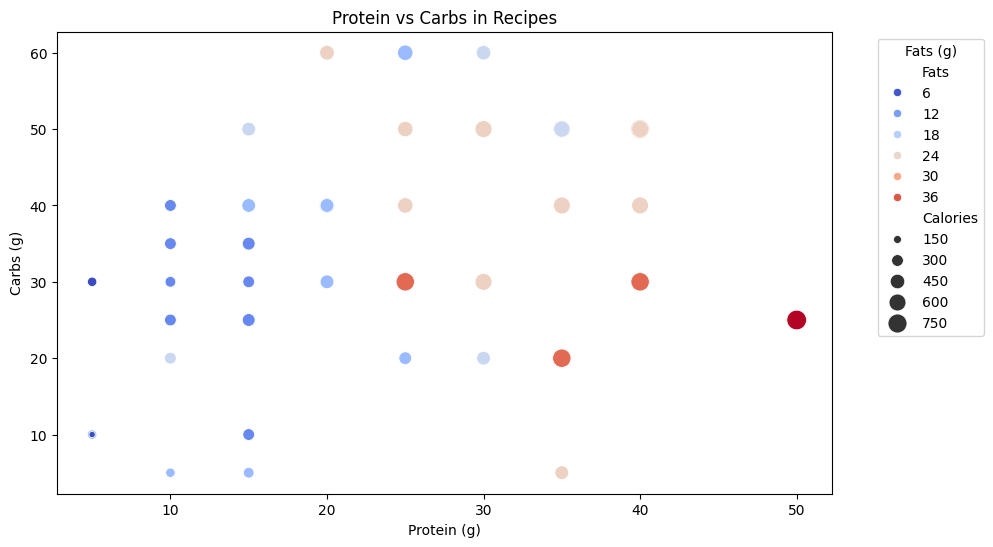

In [140]:
# Scatter plot of Protein vs Carbs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Protein', y='Carbs', data=recipe_data, hue='Fats', palette='coolwarm', size='Calories', sizes=(20, 200))
plt.title('Protein vs Carbs in Recipes')
plt.xlabel('Protein (g)')
plt.ylabel('Carbs (g)')
plt.legend(title='Fats (g)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

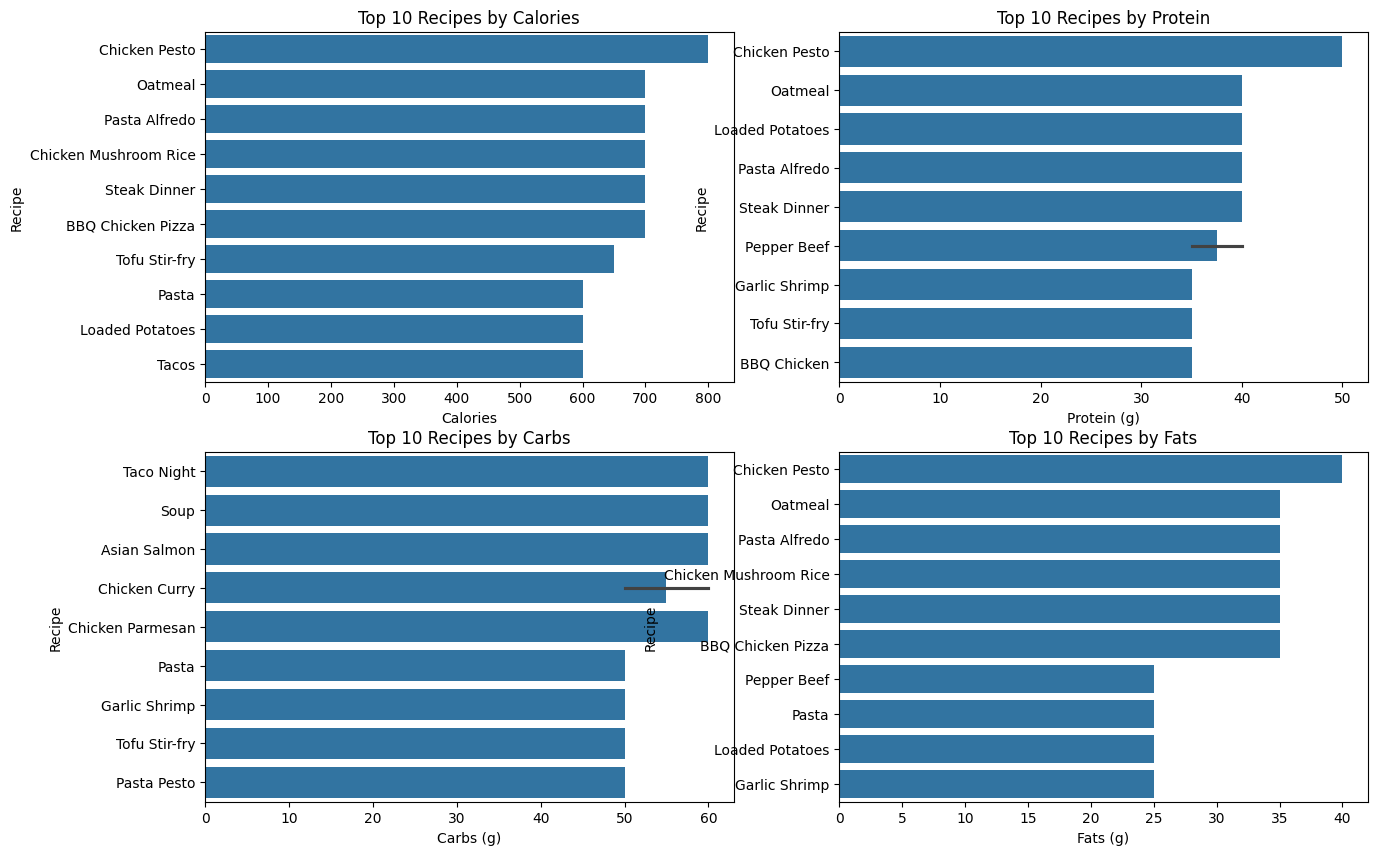

In [152]:
# Top 10 recipes by Calories
top_calories = recipe_data.nlargest(10, 'Calories')

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.barplot(x='Calories', y='Recipe', data=top_calories)
plt.title('Top 10 Recipes by Calories')
plt.xlabel('Calories')
plt.ylabel('Recipe')


# Top 10 recipes by Protein
top_protein = recipe_data.nlargest(10, 'Protein')

plt.subplot(2, 2, 2)
sns.barplot(x='Protein', y='Recipe', data=top_protein)
plt.title('Top 10 Recipes by Protein')
plt.xlabel('Protein (g)')
plt.ylabel('Recipe')


# Top 10 recipes by Carbs
top_carbs = recipe_data.nlargest(10, 'Carbs')

plt.subplot(2, 2, 3)
sns.barplot(x='Carbs', y='Recipe', data=top_carbs)
plt.title('Top 10 Recipes by Carbs')
plt.xlabel('Carbs (g)')
plt.ylabel('Recipe')


# Top 10 recipes by Fats
top_fats = recipe_data.nlargest(10, 'Fats')

plt.subplot(2, 2, 4)
sns.barplot(x='Fats', y='Recipe', data=top_fats)
plt.title('Top 10 Recipes by Fats')
plt.xlabel('Fats (g)')
plt.ylabel('Recipe')
plt.show()

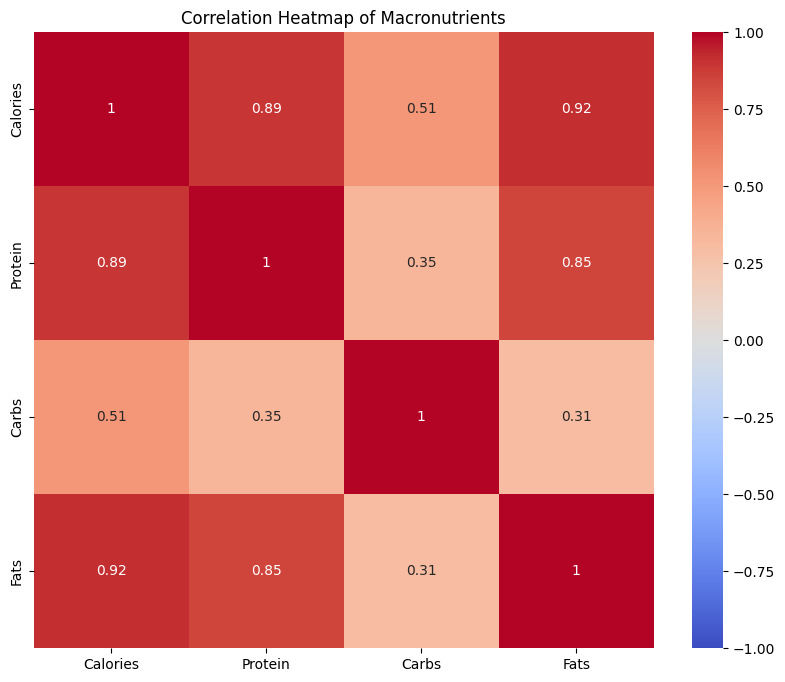

In [145]:
# Correlation matrix
correlation_matrix = recipe_data[['Calories', 'Protein', 'Carbs', 'Fats']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Macronutrients')
plt.show()

Convert Text data to Feature vectors

In [119]:
vectorizer = TfidfVectorizer()

In [120]:
feature_vector=vectorizer.fit_transform(ingredient_list)

In [121]:
print(feature_vector)

  (0, 2)	0.5241889100272942
  (0, 64)	0.6021735574584778
  (0, 76)	0.6021735574584778
  (1, 44)	0.5773502691896258
  (1, 69)	0.5773502691896258
  (1, 2)	0.5773502691896258
  (2, 26)	0.5
  (2, 73)	0.5
  (2, 4)	0.5
  (2, 63)	0.5
  (3, 55)	0.48825860571866714
  (3, 70)	0.2984219258110526
  (3, 81)	0.48825860571866714
  (3, 8)	0.40467554969002373
  (3, 38)	0.5199895398578959
  (4, 74)	0.560528397427824
  (4, 14)	0.560528397427824
  (4, 70)	0.3618044321625177
  (4, 8)	0.4906255030280723
  (5, 27)	0.6174393141115601
  (5, 45)	0.6174393141115601
  (5, 81)	0.4873780737568041
  (6, 21)	0.5771989920776172
  (6, 57)	0.5131985518807495
  (6, 70)	0.3312544226160273
  :	:
  (49, 38)	0.45025324879952466
  (50, 6)	0.6184635937335216
  (50, 61)	0.6184635937335216
  (50, 22)	0.3559944602521504
  (50, 70)	0.3290494046829676
  (51, 32)	0.542923054724106
  (51, 71)	0.4564095185420265
  (51, 59)	0.4564095185420265
  (51, 9)	0.4564095185420265
  (51, 22)	0.2833824461778675
  (52, 74)	0.560528397427824
  (52,

Cosine Similarity

In [122]:
#Similarity confidence
similarity=cosine_similarity(feature_vector)

In [123]:
print(similarity)

[[1.         0.30264061 0.         ... 0.         0.         0.        ]
 [0.30264061 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.2670353  0.14984751]
 [0.         0.         0.         ... 0.2670353  1.         0.14534058]
 [0.         0.         0.         ... 0.14984751 0.14534058 1.        ]]


In [124]:
print(similarity.shape)

(56, 56)


In [125]:
#User inputs available ingredients

available_ingredients = input('Enter the available ingredients: ')

Enter the available ingredients: Chicken,rice


In [126]:
Recipe_list = recipe_data['Recipe'].tolist()
Ingredient_list = recipe_data['Ingredients'].tolist()
print(Recipe_list)
print(Ingredient_list)

['Taco Night', 'Spaghetti Bolognese', 'Chicken Mushroom Rice', 'Chicken Curry', 'Pepper Beef', 'Salad', 'Pasta', 'Smoothie', 'Soup', 'Bowl', 'Sandwich', 'Oatmeal', 'Scramble', 'Stir-fry', 'Grilled Fish', 'Salad', 'Loaded Potatoes', 'Turkey Sandwich', 'Yogurt Parfait', 'Stir-fry', 'Garlic Shrimp', 'Lamb Chops', 'Tuna Salad', 'Tofu Stir-fry', 'BBQ Chicken', 'Tacos', 'Omelette', 'Breakfast Bowl', 'Asian Salmon', 'Chicken Parmesan', 'Pasta Alfredo', 'Chicken Pesto', 'Spaghetti Bolognese', 'Chicken Mushroom Rice', 'Pasta Pesto', 'Garlic Shrimp', 'Honey Pork', 'Turkey Dinner', 'Steak Dinner', 'Chicken Curry', 'Rosemary Lamb', 'Pepper Beef', 'Teriyaki Chicken', 'Lemon Salmon', 'Shrimp Alfredo', 'Spaghetti Marinara', 'Buffalo Chicken', 'Caesar Chicken Salad', 'Chicken Alfredo', 'Taco Night', 'BBQ Chicken Pizza', 'Chicken Fajitas', 'Beef Stir-fry', 'Mushroom Chicken', 'Curry Chicken', 'Chicken Parmesan']
['Steak, Potatoes, Asparagus', 'Salmon, Asparagus, Lemon', 'Potato, Bacon, Sour Cream', 'Gr

In [127]:
print(len(Recipe_list))

56


In [128]:
#Finding close match for the Recipe
close_match=difflib.get_close_matches(available_ingredients,Ingredient_list)
print(close_match)

['Chicken, Mushroom, Rice', 'Chicken, Curry Sauce, Rice', 'Chicken, Curry Sauce, Rice']


In [129]:
closest_match = close_match[0]
print(closest_match)

Chicken, Mushroom, Rice


In [130]:
#Find the index of the closest match in dataset
index_of_closest_match = Ingredient_list.index(closest_match)
print(index_of_closest_match)

33


In [131]:
#Getting a list of Recipes
similarity_score = list(enumerate(similarity[index_of_closest_match]))
print(similarity_score)

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.1563309430887673), (9, 0.3039326319979236), (10, 0.0), (11, 0.0), (12, 0.3641040227357068), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.14108074798334802), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.1529928769876063), (30, 0.0), (31, 0.15545392870903507), (32, 0.0), (33, 1.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.5065667770450273), (40, 0.0), (41, 0.0), (42, 0.1498195391599993), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.12009595621242754), (47, 0.11897978380211628), (48, 0.15411023458601017), (49, 0.0), (50, 0.14679712028866548), (51, 0.11685498423150648), (52, 0.0), (53, 0.5710412971984206), (54, 0.5065667770450273), (55, 0.16036293427207948)]


In [132]:
len(similarity_score)

56

In [133]:
#Sorting based on similarity score
sorted_ingredients = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_ingredients)


[(33, 1.0), (53, 0.5710412971984206), (39, 0.5065667770450273), (54, 0.5065667770450273), (12, 0.3641040227357068), (9, 0.3039326319979236), (55, 0.16036293427207948), (8, 0.1563309430887673), (31, 0.15545392870903507), (48, 0.15411023458601017), (29, 0.1529928769876063), (42, 0.1498195391599993), (50, 0.14679712028866548), (24, 0.14108074798334802), (46, 0.12009595621242754), (47, 0.11897978380211628), (51, 0.11685498423150648), (0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (10, 0.0), (11, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (30, 0.0), (32, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (40, 0.0), (41, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (49, 0.0), (52, 0.0)]


In [134]:
#print the name of the recipe using the index
print('Recipe suggestions: \n')
i = 1
for recipe in sorted_ingredients:
  index = recipe[0]
  title_from_index = recipe_data[recipe_data.index==index]['Recipe'].values[0]
  if (i<4):
    print(i, '.',title_from_index)
    i+=1


Recipe suggestions: 

1 . Chicken Mushroom Rice
2 . Mushroom Chicken
3 . Chicken Curry


MEALMATE WORKING

In [159]:
available_ingredients = input('Enter the available ingredients: ')

Ingredient_list = recipe_data['Ingredients'].tolist()

close_match=difflib.get_close_matches(available_ingredients,Ingredient_list)

closest_match = close_match[0]

index_of_closest_match = Ingredient_list.index(closest_match)

similarity_score = list(enumerate(similarity[index_of_closest_match]))

sorted_ingredients = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Recipe suggestions: \n')
i = 1
for recipe in sorted_ingredients:
  index = recipe[0]
  title_from_index = recipe_data.iloc[index]['Recipe']
  calories = recipe_data.iloc[index]['Calories']
  protein = recipe_data.iloc[index]['Protein']
  carbs = recipe_data.iloc[index]['Carbs']
  fats = recipe_data.iloc[index]['Fats']

  if i < 4:
            print(f"{i}. {title_from_index}")
            print(f"   - Calories: {calories} kcal")
            print(f"   - Protein: {protein} g")
            print(f"   - Carbs: {carbs} g")
            print(f"   - Fats: {fats} g\n")
            i += 1


Enter the available ingredients: Banana,milk
Recipe suggestions: 

1. Smoothie
   - Calories: 250 kcal
   - Protein: 10 g
   - Carbs: 30 g
   - Fats: 5 g

2. Breakfast Bowl
   - Calories: 150 kcal
   - Protein: 10 g
   - Carbs: 20 g
   - Fats: 5 g

3. Honey Pork
   - Calories: 500 kcal
   - Protein: 25 g
   - Carbs: 40 g
   - Fats: 15 g

